Written by Yoja Wang , Major at Data science, Her Github account is yokieeeee

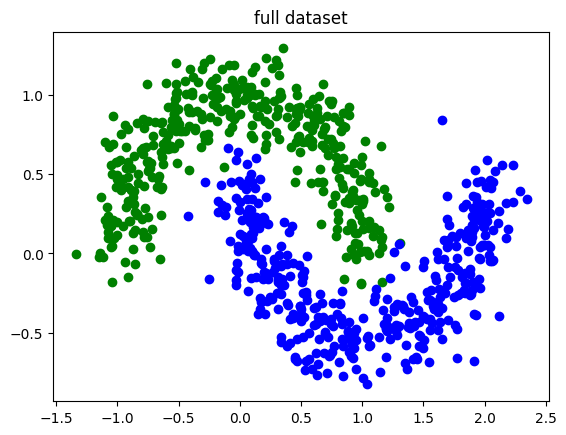

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from math import e

# ========================================================================
# dataset

"""
n_tot = 800
n = int(n_tot/2)
# two moons, not really linearly separable
X, y = make_moons(n_tot, noise=0.15, random_state=0)

# divide data into training and testing
np.random.seed(42)
order = np.random.permutation(n_tot)
train = order[:n]
test = order[n:]

Xtr = X[train, :]
ytr = y[train]
Xtst = X[test, :]
ytst = y[test]

np.save("quiz2_datafiles/Xtr.npy", Xtr)
np.save("quiz2_datafiles/Xtst.npy", Xtst)
np.save("quiz2_datafiles/ytr.npy", ytr)
np.save("quiz2_datafiles/ytst.npy", ytst)
"""

Xtr = np.load("Xtr.npy")
Xtst = np.load("Xtst.npy")
ytr = np.load("ytr.npy")
ytst = np.load("ytst.npy")
n = len(ytr)

plt.figure()
colors = ["g", "b"]
for (X, y) in [(Xtr, ytr), (Xtst, ytst)]:
    for ii in range(2):
        class_indices = np.where(y==ii)[0]
        plt.scatter(X[class_indices, 0], X[class_indices, 1], c=colors[ii])
plt.title("full dataset")
plt.show()

In [2]:
from sklearn.linear_model import Perceptron as binary_classifier

It can be used like this:

In [3]:
bc = binary_classifier()
bc.fit(Xtr, ytr)  # this is how to train the classifier on training data
preds = bc.predict(Xtst)  # this is how to obtain predictions on test data

You can find the equation below in Lecture3 page 32 and page 24

In [4]:
def Rademacher_compute(epr,erc,m,delta):
    return  epr + erc + 3 * np.sqrt(np.log(2/delta) / (2 * m))

In [5]:
def VC_dimension(epc,vcd, m, delta):
    return  epr + np.sqrt(2 * np.log(e * m / vcd) / (m / vcd)) + np.sqrt(np.log(1 / delta) / (2 * m))

In [ ]:
n_array = list(range(50, 301))
f1 = True 
f2 = True
for n in n_array:
    bc = binary_classifier()
    bc.fit(Xtr[:n, :], ytr[:n])
    ytr_pred = bc.predict(Xtr[:n,:])
    epr = np.count_nonzero(ytr_pred - ytr[:n])/n  #minimizing the empirical risk 
    test_pred = bc.predict(Xtst)
    test_error = np.count_nonzero(test_pred - ytst) / len(ytst)  #compute the test error 

    M = 500
    exp_rademacher_errors = []
    for j in range(M):
        bc = binary_classifier()
        noise = np.round(np.random.rand(n)) #add random noise
        bc.fit(Xtr[:n,:],noise)
        noise_pred = bc.predict(Xtr[:n,:])
        rade_error = np.count_nonzero(noise_pred - noise) / n  #compute the noise error
        exp_rademacher_errors.append(rade_error)

    erc = 0.5 - np.mean(exp_rademacher_errors) # erc is calculated by 0.5 - average of the Rademacher

    rademacher_bound = Rademacher_compute(epr, erc, n, 0.05)

    vcd_bound = VC_dimension(epr, 3, n, 0.05)

    if f1 or f2  :
        print(f'n = {n}: Rademacher Bound = {rademacher_bound - test_error}, Vcd Bound = {vcd_bound - test_error}')
        if rademacher_bound - test_error < 0.4 and f1 :
            print('when Rademacher Bound drop to 0.4, the sample is ' + str(n))
            f1 = False
            continue
        if vcd_bound - test_error < 0.4 and f2 : 
            print('when Vcd_bound drop to 0.4, the sample is ' + str(n))
            f2 = False

n = 50: Rademacher Bound = 0.5147936747919525, Vcd Bound = 0.7545500829038365
n = 51: Rademacher Bound = 0.5287226337268938, Vcd Bound = 0.76924031277195
n = 52: Rademacher Bound = 0.5244659214178655, Vcd Bound = 0.7616471403429581
n = 53: Rademacher Bound = 0.474809147663593, Vcd Bound = 0.7165246946677184
n = 54: Rademacher Bound = 0.5005537331886002, Vcd Bound = 0.7345711435571243
n = 55: Rademacher Bound = 0.5422063858013405, Vcd Bound = 0.779615605328196
n = 56: Rademacher Bound = 0.4830589894671188, Vcd Bound = 0.7257493195202505
n = 57: Rademacher Bound = 0.4579442942174699, Vcd Bound = 0.696513185174704
n = 58: Rademacher Bound = 0.4836375688936424, Vcd Bound = 0.7198590016678766
n = 59: Rademacher Bound = 0.47808181437991376, Vcd Bound = 0.7187926169137586
n = 60: Rademacher Bound = 0.503890455292247, Vcd Bound = 0.7459527604410292
n = 61: Rademacher Bound = 0.47912845523745135, Vcd Bound = 0.711591958189079
n = 62: Rademacher Bound = 0.48524364654753294, Vcd Bound = 0.7215915